#Coronavirus World Data Analysis
#####This is a starter project about global data on covid cases. If you'd like a copy of the dataset please contact me. In this notebook, we are going to explore and prepare the data, model some data and come to conclusions about what we find.

Loading all necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.0f}'.format
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRWK_CN6009_2023/worldometer_corona.csv')
df.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,NaN,162804,NaN,2576668,NaN,2292707,18296,15194,492,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,NaN,98644,NaN,2047660,NaN,771258,8318,13716,464,13206188,62085,Americas
2,India,Asia,1381344997,2025409,NaN,41638,NaN,1377384,NaN,606387,8944,1466,30,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,NaN,14606,NaN,676357,NaN,180931,2300,5974,100,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,NaN,9604,NaN,387316,NaN,141264,539,9063,162,3149807,53044,Africa


Now we are going to prepare the data so it is more relevant to the answers we are looking for.


In [2]:
#dropped totaltests, WHO region, test/1m pop
df2 = df.drop(columns=['WHO Region', 'Tests/1M pop', 'TotalTests'])
df2.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,North America,331198130,5032179,NaN,162804,NaN,2576668,NaN,2292707,18296,15194,492
1,Brazil,South America,212710692,2917562,NaN,98644,NaN,2047660,NaN,771258,8318,13716,464
2,India,Asia,1381344997,2025409,NaN,41638,NaN,1377384,NaN,606387,8944,1466,30
3,Russia,Europe,145940924,871894,NaN,14606,NaN,676357,NaN,180931,2300,5974,100
4,South Africa,Africa,59381566,538184,NaN,9604,NaN,387316,NaN,141264,539,9063,162


Removed unecessary columns

In [3]:
df2. isna(). sum(). sum() #initially 758 nulls in our dataframe, get rid or replace the null values.

758

In [4]:
df2['NewCases'].isna().sum() #205 nulls

205

In [5]:
df2['NewDeaths'].isna().sum() #206 nulls

206

In [6]:
df2['NewRecovered'].isna().sum() #206 nulls

206

Lets replace the missing values with the mean of the filled in values. Note this is not always the best way of representing the null values as the averages can be overboard or too low. Deleting nulls was also an option but at that point it would ruin the dataset.

In [7]:
df2['NewCases'] = df2['NewCases'].fillna(df2["NewCases"].mean())

In [8]:
df2['NewCases']

0     1980
1     1980
2     1980
3     1980
4     1980
      ... 
204   1980
205   1980
206   1980
207   1980
208   1980
Name: NewCases, Length: 209, dtype: float64

In [9]:
df2['NewDeaths'] = df2['NewDeaths'].fillna(df2["NewDeaths"].mean())

In [10]:
df2['NewDeaths']

0     300
1     300
2     300
3     300
4     300
       ..
204   300
205   300
206   300
207   300
208   300
Name: NewDeaths, Length: 209, dtype: float64

In [11]:
df2['NewRecovered'] = df2['NewRecovered'].fillna(df2["NewRecovered"].mean())

In [12]:
df2['NewRecovered']

0     1706
1     1706
2     1706
3     1706
4     1706
      ... 
204   1706
205   1706
206   1706
207   1706
208   1706
Name: NewRecovered, Length: 209, dtype: float64

In [13]:
df2. isna(). sum(). sum() #141 null values now

141

In [14]:
df2['Serious,Critical'].isna().sum()

87

In [15]:
df2['Serious,Critical'] = df2['Serious,Critical'].fillna(df2["Serious,Critical"].mean())

In [16]:
df2['Serious,Critical']

0     18296
1      8318
2      8944
3      2300
4       539
       ... 
204     534
205     534
206     534
207     534
208     534
Name: Serious,Critical, Length: 209, dtype: float64

In [17]:
df2. isna(). sum(). sum() #at this point we had 54 null values

54

In [18]:
null_cols = df2.isnull().any()
print(null_cols[null_cols == True].index.tolist())

['Continent', 'Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop', 'Deaths/1M pop']


We can continue to fill in the null values with mean values for numerical columns and drop rows if needed

In [19]:
df2['Population'] = df2['Population'].fillna(df2["Population"].mean())

In [20]:
df2['Population']

0      331198130
1      212710692
2     1381344997
3      145940924
4       59381566
         ...    
204         4992
205        26247
206         3489
207          801
208       598682
Name: Population, Length: 209, dtype: float64

In [21]:
df2['TotalDeaths'] = df2['TotalDeaths'].fillna(df2["TotalDeaths"].mean())

In [22]:
df2['TotalDeaths']

0     162804
1      98644
2      41638
3      14606
4       9604
       ...  
204        1
205     3793
206     3793
207     3793
208        1
Name: TotalDeaths, Length: 209, dtype: float64

In [23]:
df2['TotalRecovered'] = df2['TotalRecovered'].fillna(df2["TotalRecovered"].mean())

In [24]:
df2['TotalRecovered']

0     2576668
1     2047660
2     1377384
3      676357
4      387316
        ...  
204        10
205         7
206        13
207        12
208         8
Name: TotalRecovered, Length: 209, dtype: float64

In [25]:
df2['ActiveCases'] = df2['ActiveCases'].fillna(df2["ActiveCases"].mean())

In [26]:
df2['ActiveCases']

0     2292707
1      771258
2      606387
3      180931
4      141264
        ...  
204         2
205         6
206         0
207         0
208         1
Name: ActiveCases, Length: 209, dtype: float64

In [27]:
df2 = df2[df2['Continent'].notnull()]

In [28]:
df2 = df2[df2['Deaths/1M pop'].notnull()]

In [29]:
df2. isna(). sum(). sum()

0

At this point, we have 0 null values, although some of the values are fabricated.

In [30]:
df2.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,North America,331198130,5032179,1980,162804,300,2576668,1706,2292707,18296,15194,492
1,Brazil,South America,212710692,2917562,1980,98644,300,2047660,1706,771258,8318,13716,464
2,India,Asia,1381344997,2025409,1980,41638,300,1377384,1706,606387,8944,1466,30
3,Russia,Europe,145940924,871894,1980,14606,300,676357,1706,180931,2300,5974,100
4,South Africa,Africa,59381566,538184,1980,9604,300,387316,1706,141264,539,9063,162


Now we can attempt to look at the data itself and do some modelling to help us understand.

In [31]:
df2[(df2['TotalDeaths'] > 300) & (df2['Continent'] == 'Africa')]

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
4,South Africa,Africa,59381566,538184,1980,9604,300,387316,1706,141264,539,9063,162
26,Egypt,Africa,102516525,95006,1980,4951,300,48898,1706,41157,41,927,48
45,Nigeria,Africa,206606300,45244,1980,930,300,32430,1706,11884,7,219,5
54,Algeria,Africa,43926079,33626,1980,1273,300,23238,1706,9115,57,766,29
56,Morocco,Africa,36953359,29644,1980,449,300,20553,1706,8642,31,802,12
61,Kenya,Africa,53881160,24411,1980,399,300,10444,1706,13568,44,453,7
66,Ethiopia,Africa,115223736,20900,1980,365,300,9027,1706,11508,185,181,3
70,Cameroon,Africa,26606188,17718,1980,391,300,15320,1706,2007,30,666,15
78,Sudan,Africa,43943536,11780,1980,763,300,6194,1706,4823,534,268,17


These are all the African countries with more than 300 total deaths.

It is a good idea to gauge the max values to understand the graphs more clearly.

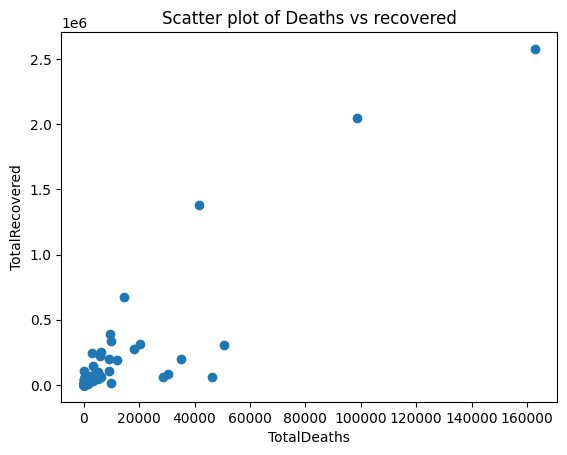

In [32]:
xscatter = df2["TotalDeaths"]
yscatter = df2["TotalRecovered"]
plt.scatter(xscatter, yscatter)
plt.xlabel("TotalDeaths")
plt.ylabel("TotalRecovered")
plt.title("Scatter plot of Deaths vs recovered")
plt.show()

1e6 = 10^6 = 1,000,000. As you can see, the countries with the most deaths also have the most people recovering from covid.

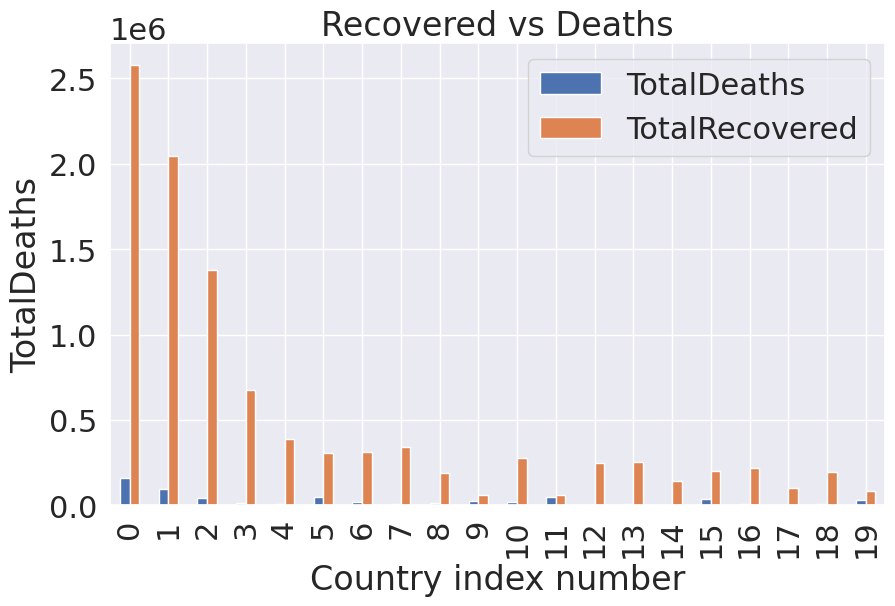

In [51]:
# Plot a bar graph of the totaldeaths vs totalrecovered columns
ax = df2.head(20)[['TotalDeaths', 'TotalRecovered']].plot(kind='bar', figsize=(10, 6))

# Set the title and labels
ax.set_title('Recovered vs Deaths')
ax.set_ylabel('TotalDeaths')
ax.set_xlabel('Country index number')

# Show the plot
plt.show()

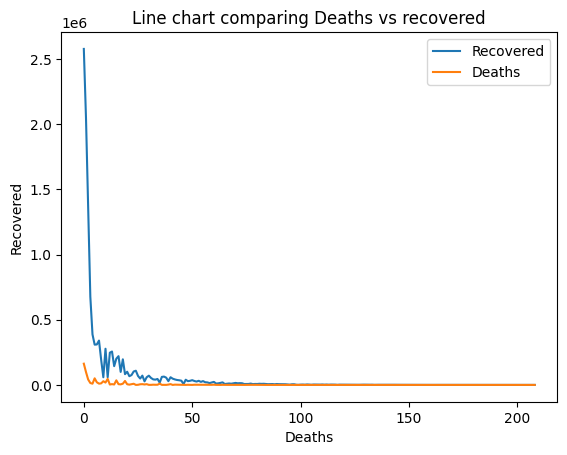

In [34]:
plt.plot(df2['TotalRecovered'], label='Recovered')
plt.plot(df2['TotalDeaths'], label='Deaths')

# Add axis labels and a title
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.title('Line chart comparing Deaths vs recovered')

# Add a legend
plt.legend()

# Display the chart
plt.show()

Line graphs suggests that the more the recoveries the more the total deaths in that country,

Now lets look at the Continent of North America

In [35]:
df2_north_america = df2.loc[df2['Continent'] == 'North America']

<Axes: xlabel='TotalRecovered', ylabel='TotalDeaths'>

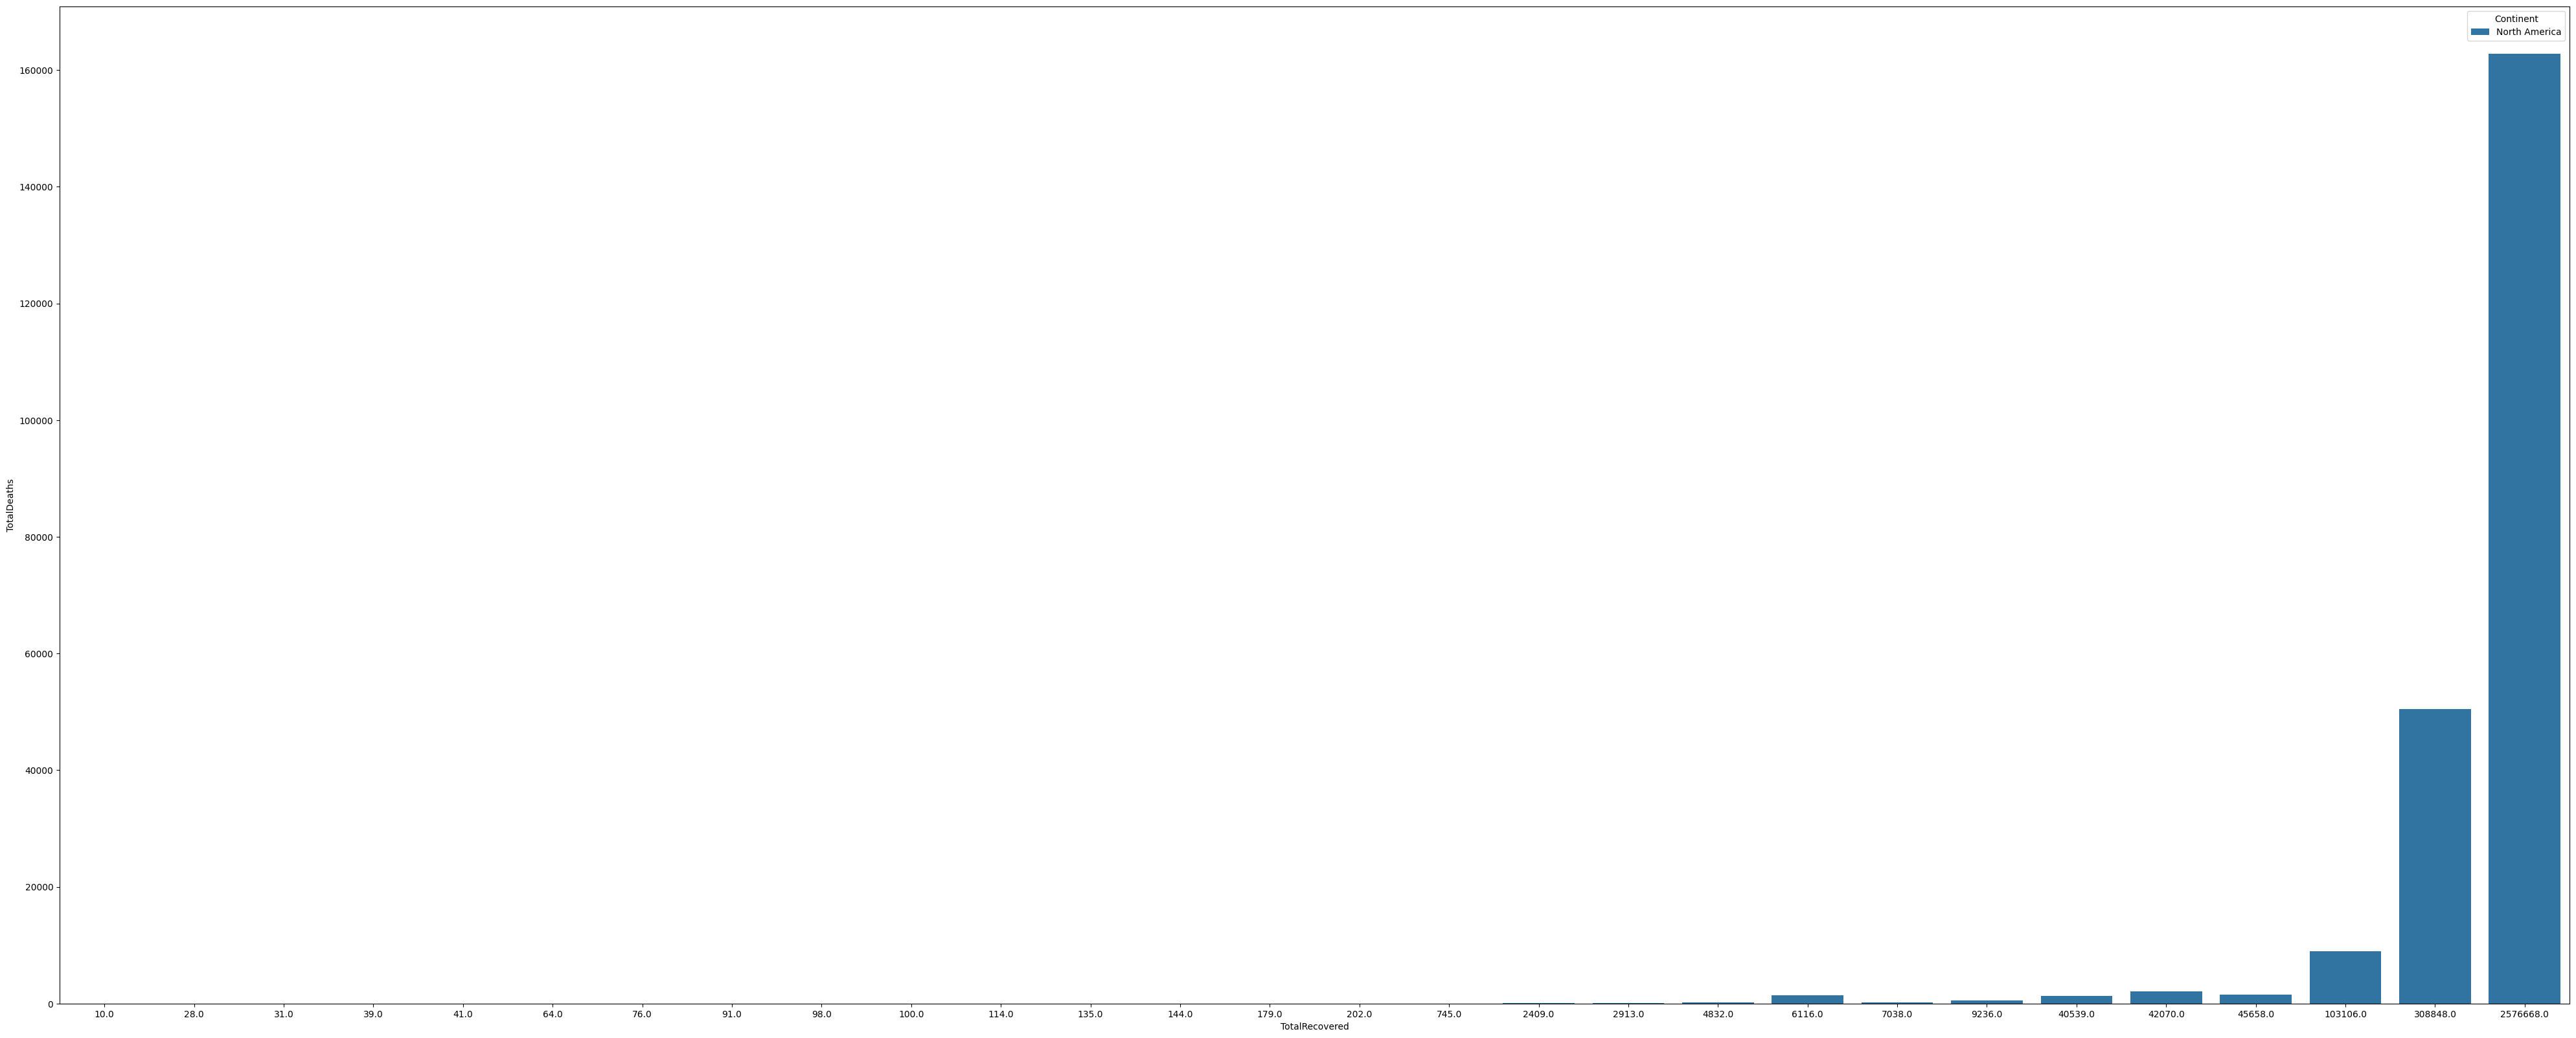

In [36]:
plt.figure(figsize=(50,20))
sns.barplot(x='TotalRecovered', y='TotalDeaths', hue='Continent', data=df2_north_america)

We do not know which countries in North America these stats pertain to, lets find out

In [37]:
selected_columns = ['TotalRecovered', 'TotalDeaths', 'Continent', 'Country/Region']
threshold = 100000
north_america_df = df2[df2['Continent'] == 'North America']
display_df = north_america_df[selected_columns]
display_df


,TotalRecovered,TotalDeaths,Continent,Country/Region
0,2576668,162804,North America,USA
5,308848,50517,North America,Mexico
23,103106,8966,North America,Canada
33,40539,1246,North America,Dominican Republic
34,45658,1574,North America,Panama
42,42070,2119,North America,Guatemala
46,6116,1423,North America,Honduras
65,7038,200,North America,Costa Rica
68,9236,513,North America,El Salvador
88,4832,171,North America,Haiti


Now lets look at USA indivdually.

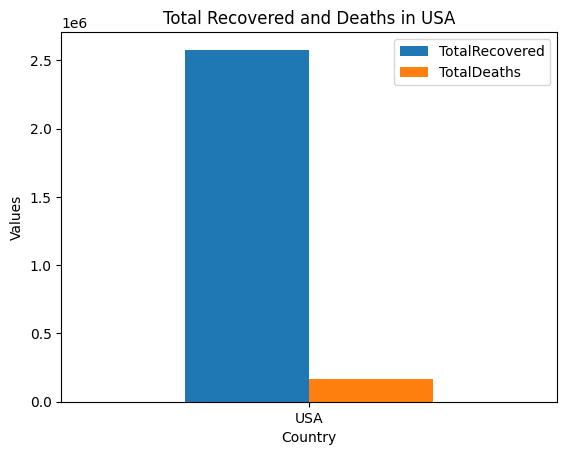

In [38]:
df2_na = df2[df2['Country/Region'] == 'USA']
df3_na = df2_na[selected_columns].query('TotalRecovered > @threshold and TotalDeaths > @threshold')  # Query for high values
ax = df3_na.plot.bar(x='Country/Region', rot=0)
ax.set_xlabel("Country")
ax.set_ylabel("Values")
ax.set_title("Total Recovered and Deaths in USA")
plt.show()

In [39]:
df2.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
count,187,187,187,187,187,187,187,187,187,187,187
mean,33644110,102495,1980,3813,300,65794,1706,30917,546,3373,99
std,110044222,456241,397,15526,47,267982,223,182611,1650,5325,175
min,4992,10,20,1,1,8,42,0,1,7,0
25%,2081166,1216,1980,22,300,833,1706,218,18,344,6
50%,9197590,6375,1980,119,300,4974,1706,1346,239,1274,29
75%,29536692,43994,1980,800,300,30828,1706,9568,534,4042,98
max,1381344997,5032179,6590,162804,819,2576668,4140,2292707,18296,39922,1238


<Figure size 35000x35000 with 0 Axes>

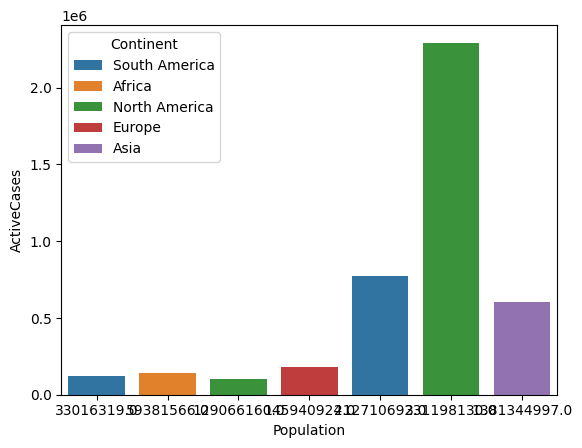

<Figure size 35000x35000 with 0 Axes>

In [40]:
sns.barplot(data = df2.head(7),
            x = 'Population',
            y = 'ActiveCases',
            hue = 'Continent');
plt.figure(figsize=(350, 350))

Ram space on colab was low, could not enlarge figure above.

In [41]:
df2[['Population', 'Continent', 'Country/Region']]

,Population,Continent,Country/Region
0,331198130,North America,USA
1,212710692,South America,Brazil
2,1381344997,Asia,India
3,145940924,Europe,Russia
4,59381566,Africa,South Africa
...,...,...,...
192,38729,North America,Saint Martin
194,164161,North America,Curaçao
195,897095,Australia/Oceania,Fiji
204,4992,North America,Montserrat


Here we compare random instances of population vs cases

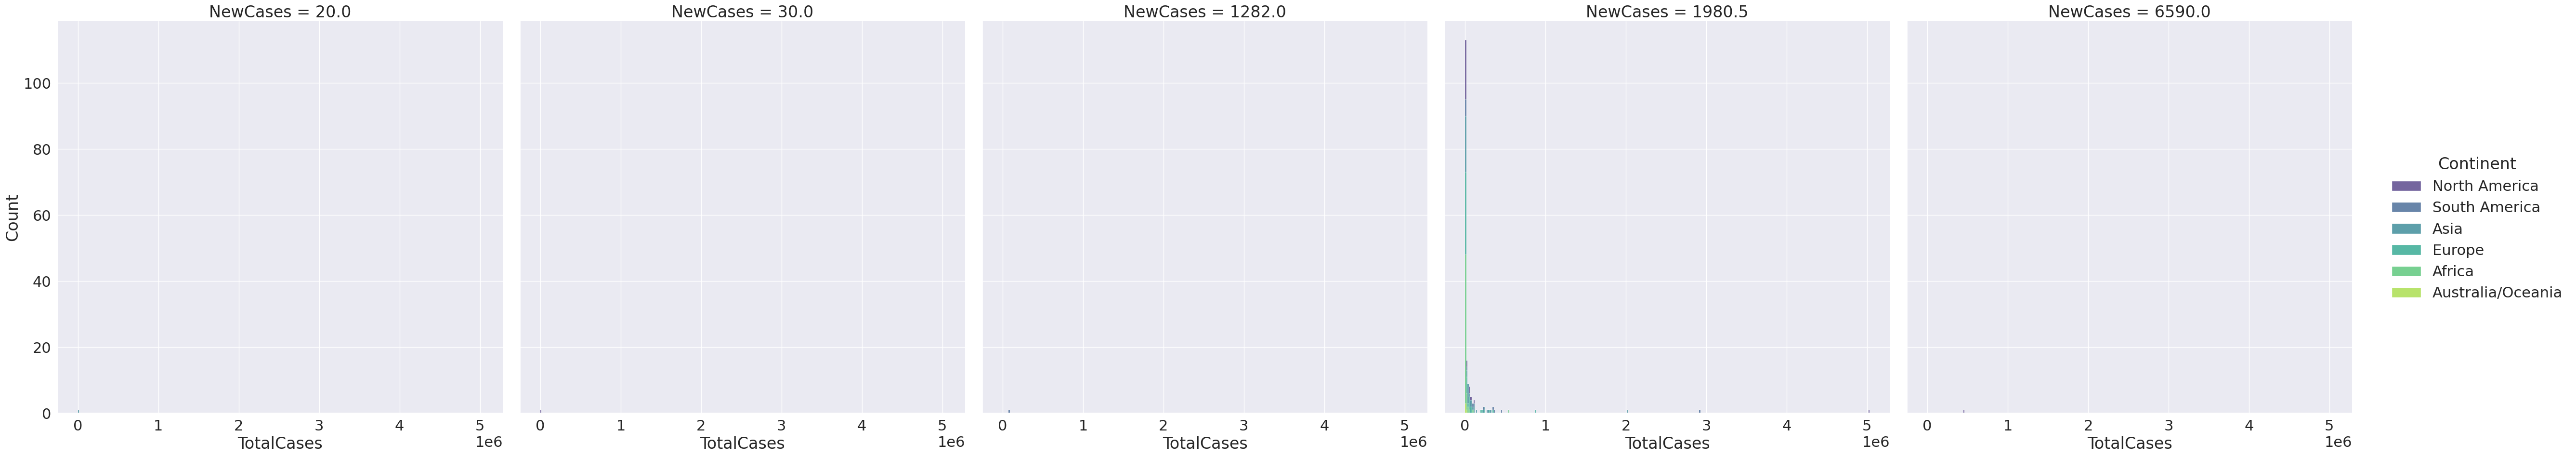

In [42]:
sns.set(font_scale = 2)
sns.displot(data = df2, x = 'TotalCases', col = 'NewCases',
            hue = 'Continent', multiple = 'stack',
            height = 10, palette = 'viridis');

Here we compare totalcases to newcases based on the continent. The reason for the biased distribution of results is because NewCases was filled with the mean and 95% of those are in one graph

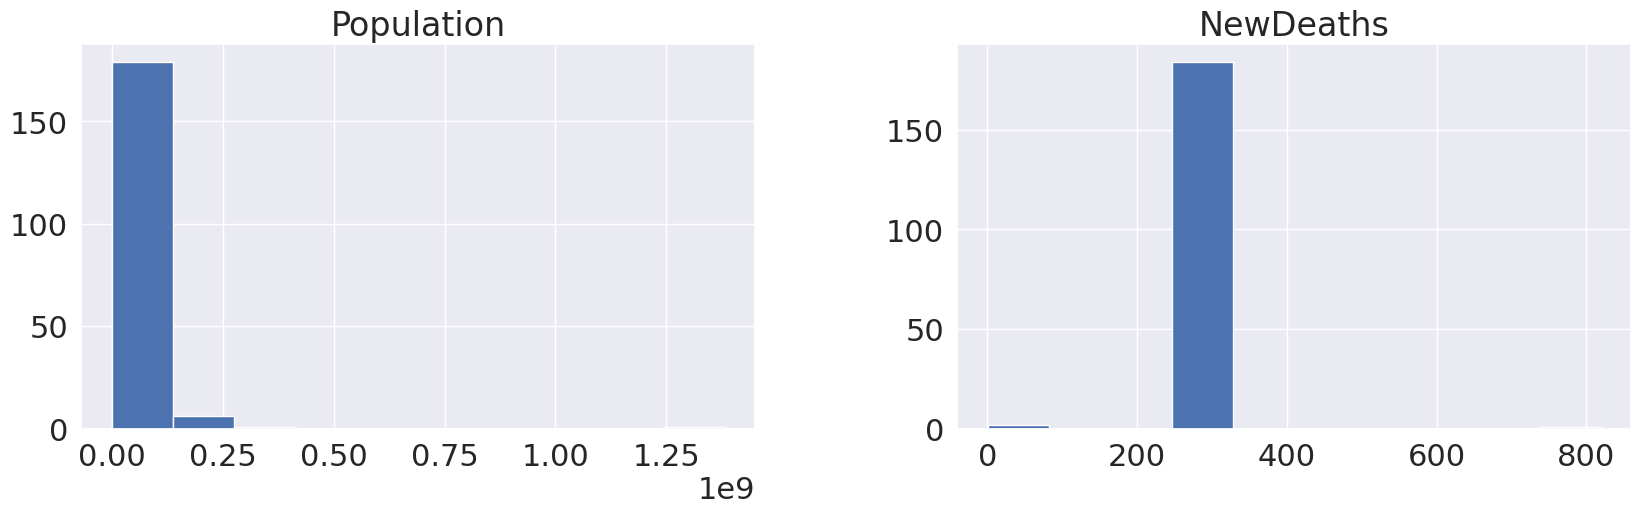

In [43]:
df2.hist(['Population', 'NewDeaths'], figsize = (20,5));

Most new deaths are the value 300 due to the mean value. 1e9 = 10^9 = 1,000,000,000

In [53]:
df2.groupby('Continent').mean().sort_values(by = 'Population', ascending = True)

<ipython-input-53-6aef04441b1c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Continent').mean().sort_values(by = 'Population', ascending = True)


,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
Continent,,,,,,,,,,,
Australia/Oceania,10097767,5412,1980,70,300,3134,1706,2208,414,285,4
Europe,16613204,66269,1980,4561,300,40498,1706,13019,258,4075,215
North America,21031712,211394,2075,8209,319,112555,1793,90631,1128,3085,111
Africa,24361198,18390,1980,402,300,12605,1706,5383,284,1147,18
South America,33162075,349482,1927,11914,283,239703,1647,97864,1100,8055,217
Asia,74847679,111644,1934,2396,293,83512,1666,25736,650,4574,44


In [45]:
df2[['Continent', 'TotalDeaths']].groupby('Continent').mean().sort_values(by = 'Continent', ascending = True)

,TotalDeaths
Continent,
Africa,402
Asia,2396
Australia/Oceania,70
Europe,4561
North America,8209
South America,11914


Although Africa has the most records, South America is the continent responsible for the most deaths

In [46]:
df2[['Country/Region', 'Tot Cases/1M pop']].groupby('Country/Region').mean().sort_values(by = 'Country/Region', ascending = True)

,Tot Cases/1M pop
Country/Region,
Afghanistan,946
Albania,2091
Algeria,766
Andorra,12216
Angola,45
...,...
Vietnam,8
Western Sahara,17
Yemen,59


All countries/regions and their total cases per 1,000,000 population

#### Findings:
- Unfortunately some key columns were missing a LOT of values which have been filled with a fabricated mean value.
- Population max is 1,400,000,000.
- Cases max of 5,000,000
- Overall deaths go to a max of 163,000 with the minimum being 0
- The average no. of cases per one million are 3,373 cases
- The average no. of deaths per one million are 99 deaths
- IQR of population is 27,500,000 (50%)
- This dataset has no obvious target variable, it can be used for clustering not classification
- Africa is responsible for just under 30% of the records due to the number of countries in Africa.
- General trend is that the higher the population the more deaths, totalcases and activecases there are.